In [52]:
import pandas as pd

# REAL WORLD SCIENCE PROJECT: BIRD STRIKE ANALYSIS

### STEP 1: DEFINE THE PROBLEM
Questions we want to answer: 
1. How many bird species are in danger?
2. Is there any correlation between the physical features to the Conservation status?

### STEP 2: LOAD THE DATA

In [53]:
data = pd.read_csv("../data/birds.csv")
data.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


### STEP 3: EXPLORE THE DATA

In [54]:
# data.info()

print(f"Dataset Information:")
print(f"- Shape: {data.shape[0]} rows x {data.shape[1]} columns")
print(f"- Columns: {', '.join(data.columns.values)}")


Dataset Information:
- Shape: 443 rows x 13 columns
- Columns: Name, ScientificName, Category, Order, Family, Genus, ConservationStatus, MinLength, MaxLength, MinBodyMass, MaxBodyMass, MinWingspan, MaxWingspan


In [55]:
print('-' * 50)
print("Data types:")
print('-' * 50)

data.dtypes

--------------------------------------------------
Data types:
--------------------------------------------------


Name                   object
ScientificName         object
Category               object
Order                  object
Family                 object
Genus                  object
ConservationStatus     object
MinLength             float64
MaxLength             float64
MinBodyMass           float64
MaxBodyMass           float64
MinWingspan           float64
MaxWingspan           float64
dtype: object

In [56]:
print('-' * 50)
print("Explore Conservation Status Column:")
print('-' * 50)

status = data["ConservationStatus"].unique()
print(f"There are {status.shape[0]} categories of Conservation status: {', '.join(status)}")

--------------------------------------------------
Explore Conservation Status Column:
--------------------------------------------------
There are 6 categories of Conservation status: LC, NT, VU, EX, EN, CR


These are IUCN Red List conservation status categories, used to describe a species’ risk of extinction. Here’s what each one means, from lowest to highest risk:

| Abbreviation | Conservation Status     | Description                                                     |
|-------------|-------------------------|-----------------------------------------------------------------|
| LC          | Least Concern           | Species is widespread and abundant; no immediate risk           |
| NT          | Near Threatened         | Close to qualifying for a threatened category                    |
| VU          | Vulnerable              | High risk of extinction in the medium term                       |
| EN          | Endangered              | Very high risk of extinction in the near future                  |
| CR          | Critically Endangered   | Extremely high risk of extinction in the immediate future        |
| EX          | Extinct                 | No known individuals remain alive                                |


In [73]:
print('-' * 50)
print("Create Conservation status dataframe:")
print('-' * 50)

conservation_status = {
    "Code": ["LC", "NT", "VU", "EN", "CR", "EX"],
    "Status": [
        "Least Concern",
        "Near Threatened",
        "Vulnerable",
        "Endangered",
        "Critically Endangered",
        "Extinct"
    ],
    "RiskLevel": [1, 2, 3, 4, 5, 6]  # 1 = lowest risk, 6 = highest risk
}

conservation_status_df = pd.DataFrame(conservation_status)
conservation_status_df

--------------------------------------------------
Create Conservation status dataframe:
--------------------------------------------------


,Code,Status,RiskLevel
0,LC,Least Concern,1
1,NT,Near Threatened,2
2,VU,Vulnerable,3
3,EN,Endangered,4
4,CR,Critically Endangered,5
5,EX,Extinct,6


In [98]:
print('-' * 50)
print("Overview of numerical columns:")
print('-' * 50)

data.describe()

--------------------------------------------------
Overview of numerical columns:
--------------------------------------------------


,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan,RiskLevel
count,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000
mean,28.536682,35.441986,327.938262,667.009752,58.557901,67.524492,1.139955
std,20.319887,27.539772,779.680106,1655.682564,104.602369,126.673177,0.515205
min,7.000000,8.900000,2.000000,3.000000,8.000000,10.600000,1.000000
25%,13.750000,16.000000,18.000000,28.000000,23.000000,25.000000,1.000000
50%,20.500000,25.000000,55.000000,89.000000,38.000000,42.000000,1.000000
75%,39.000000,46.000000,332.000000,593.000000,72.750000,83.000000,1.000000
max,138.000000,180.000000,9200.000000,14300.000000,1800.000000,2300.000000,6.000000


### STEP 4: CLEAN THE DATA

In [59]:
print('-' * 50)
print("Check missing values:")
print('-' * 50)

col_missing_counts = data.isnull().sum()

if (col_missing_counts.sum() == 0):
    print("✅ No missing values found")
else:
    for col in data.columns:
        if (col_missing_counts[col] == 0):
            continue
        print(f"Column {col}: {col_missing_counts[col]} missing values found")

--------------------------------------------------
Check missing values:
--------------------------------------------------
✅ No missing values found


In [60]:
row_duplicated = data.duplicated()
row_duplicated[row_duplicated == False]

0      False
1      False
2      False
3      False
4      False
       ...  
438    False
439    False
440    False
441    False
442    False
Length: 443, dtype: bool

In [61]:
row_duplicated = data.duplicated()
if row_duplicated.sum() == 0:
    print("✅ No duplicated record found")
else:
    print("Duplicated records found at:")
    print(row_duplicated[row_duplicated == True])


✅ No duplicated record found


In a real project, we would:
- Decide how to handle missing values (remove, fill, or keep)
- Check for duplication records
- Validate data types
- Look for outliers or incorrect values

For this example, we'll proceed with the data as-is

### STEP 5: ANALYZE THE DATA

**Analysis 1: How many bird species are in danger?**

In [88]:
counts = (
    data
    .groupby("ConservationStatus")
    .size()
    .reset_index(name="Count")
)

endangered_count_df = conservation_status_df.merge(
    counts,
    left_on="Code",
    right_on="ConservationStatus",
    how="left"
).drop(columns=["Code", "ConservationStatus"])

endangered_count_df

,Status,RiskLevel,Count
0,Least Concern,1,402
1,Near Threatened,2,27
2,Vulnerable,3,10
3,Endangered,4,2
4,Critically Endangered,5,1
5,Extinct,6,1


In [92]:
data = data.merge(
    conservation_status_df,
    left_on="ConservationStatus",
    right_on="Code",
    how="left"
).drop(columns=["Code", "Status"])

In [101]:
print(f"There are {endangered_count_df[endangered_count_df["RiskLevel"] >= 4]["Count"].sum()} species in danger:")

numerical_cols = data.select_dtypes(include="number").columns
data[data["RiskLevel"] >= 4].sort_values("RiskLevel").drop(columns=numerical_cols)

There are 4 species in danger:


,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus
92,Black rail,Laterallus jamaicensis,Rails/Gallinules/Coots,Gruiformes,Rallidae,Laterallus,EN
94,Whooping crane,Grus americana,Cranes,Gruiformes,Gruidae,Grus,EN
106,Eskimo curlew,Numenius borealis,Sandpipers/Allies,Charadriiformes,Scolopacidae,Numenius,CR
64,Passenger pigeon,Ectopistes migratorius,Pigeons/Doves,Columbiformes,Columbidae,Ectopistes,EX


**Analysis 2: Is there any correlation between the Physical Features to the Conservation status?**

In [119]:
physical_cols = data.select_dtypes(include="number").drop(columns=["RiskLevel"]).columns

print(f"Physical features of bird species: {', '.join(physical_cols.values)}")

Physical features of bird species: MinLength, MaxLength, MinBodyMass, MaxBodyMass, MinWingspan, MaxWingspan


What we care about: Correlation between physical features and `RiskLevel`

*️⃣ First, we try to use `Pearson` correlation, which assumes:
- linear relationship
- continuous variables

In [111]:
pearson_corr_matrix = data.select_dtypes(include="number").corr()
pearson_corr_matrix["RiskLevel"]

MinLength      0.034648
MaxLength      0.017013
MinBodyMass    0.061109
MaxBodyMass    0.035164
MinWingspan   -0.012187
MaxWingspan   -0.012283
RiskLevel      1.000000
Name: RiskLevel, dtype: float64

**Intepretation:**
- There is no meaningful linear relationship between body size traits and conservation risk in your data.
- Bigger or smaller species are not systematically more endangered here.

**Explanation:**

Conservation risk is usually driven more by:
- habitat loss
- human exploitation
- reproduction rate
- geographic range
- specialization

... than by raw morphology (length, mass, wingspan).

*️⃣ Now we try another correlation - `Spearman` - which is more appropriate for **ordinal** data like RiskLevel

In [112]:
spearman_corr_matrix = data.select_dtypes(include="number").corr(method="spearman")

spearman_corr_matrix["RiskLevel"]


MinLength     -0.004540
MaxLength     -0.007189
MinBodyMass    0.037211
MaxBodyMass    0.031657
MinWingspan    0.015157
MaxWingspan    0.019539
RiskLevel      1.000000
Name: RiskLevel, dtype: float64

We can see that the values are still near zero, which means that our above conclusion is robust. 

### STEP 6: VISUALIZE THE DATA

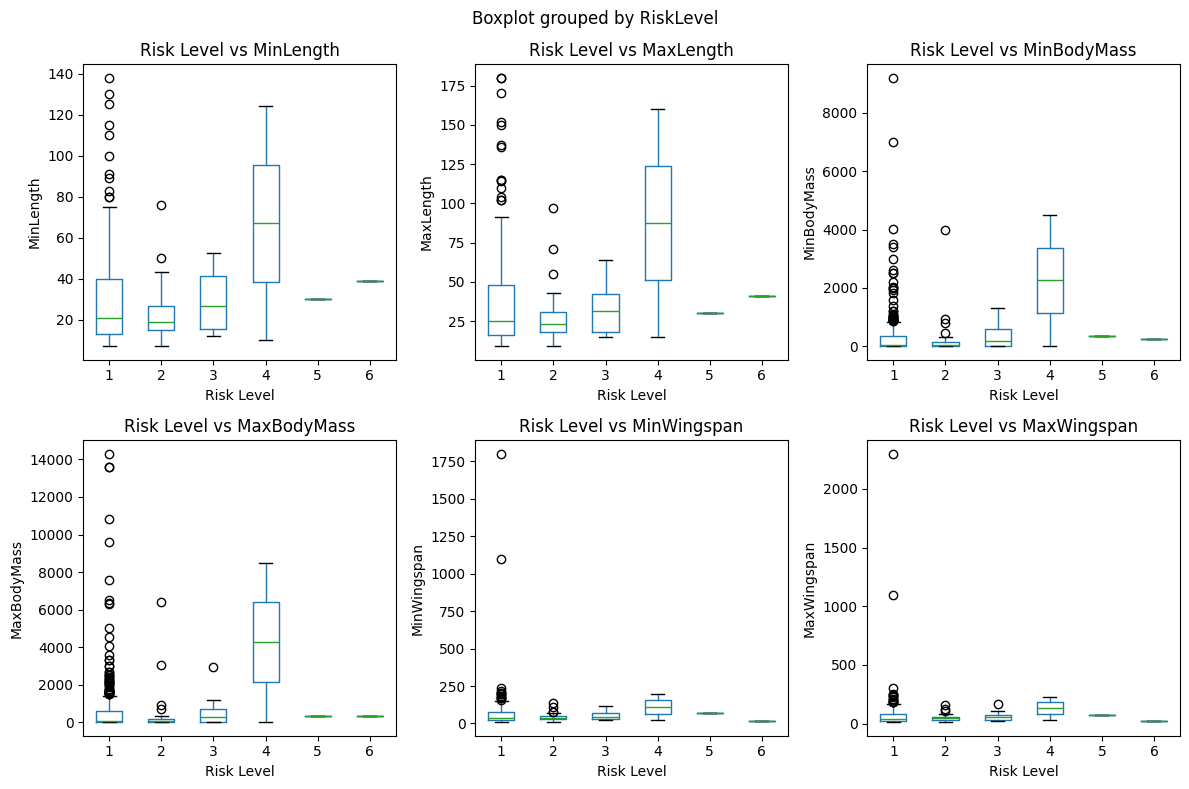

In [124]:
import math
import matplotlib.pyplot as plt

n_cols = 3
n_plots = len(physical_cols)
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))
axes = axes.flatten()  # make indexing easy

for i, col in enumerate(physical_cols):
    # axes[i].scatter(data["RiskLevel"], data[col])
    data.boxplot(column=col, by="RiskLevel", ax=axes[i], grid=False)

    axes[i].set_xlabel("Risk Level")
    axes[i].set_ylabel(col)
    axes[i].set_title(f"Risk Level vs {col}")

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


### STEP 7: CONCLUDE

Both Pearson and Spearman correlations between conservation risk level and morphological traits (body length, body mass, wingspan) were close to zero. 

Boxplots further show substantial overlap in trait distributions across risk categories, with no monotonic trend. 

This suggests that extinction risk in this dataset is **not** associated with body size–related characteristics.